## Task 3
- Chose to look at how phashed images spread over time
- And how the CNN cluster 

In [2]:
import os
import json
import numpy as np
import pandas as pd
import imagehash
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from image_analysis.data import get_images_dataframe, get_images, get_image
from sdm.config import get_db_connection

## Perceptual Hashing

In [67]:
df = pd.read_csv("../../../../data/phash_imgs.csv")
df = df[df["phash"] == "8080808080c08e88"]
media_keys = tuple(df["media_keys"].apply(lambda x: eval(x)[0]).unique())
(media_keys)

('3_674254206774153217',
 '3_675350454533009408',
 '3_675351140691795968',
 '3_675351147100676096',
 '3_675350462720274432',
 '3_675351146685419520')

In [68]:
conn = get_db_connection(db_type="sqlite", db_path="../../../../data/twitter.db")
cur = conn.cursor()
res = cur.execute(f"""
        SELECT
            tweets.id,
            tweets.text,
            tweets.author_id,
            value as media_key,
            json_extract(public_metrics, '$.retweet_count') AS retweet_count,
            tweets.lang,
            datetime(created_at) AS created_at
        FROM tweets,
            json_each(json_extract(attachments, '$.media_keys'))
        WHERE
            json_extract(public_metrics, '$.retweet_count') IS NOT NULL
        AND
            media_key IN {media_keys}
        ORDER BY created_at
""")
df = pd.DataFrame(res.fetchall())
print(f"{len(df['author_id'].unique())} Unique author posts")
df["created_at"] = pd.to_datetime(df["created_at"])
df["retweet_cum_sum"] = df["retweet_count"].cumsum()
print(df.info())
df.head()

8 Unique author posts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2027 non-null   object        
 1   text             2027 non-null   object        
 2   author_id        2027 non-null   object        
 3   media_key        2027 non-null   object        
 4   retweet_count    2027 non-null   int64         
 5   lang             2027 non-null   object        
 6   created_at       2027 non-null   datetime64[ns]
 7   retweet_cum_sum  2027 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 126.8+ KB
None


,id,text,author_id,media_key,retweet_count,lang,created_at,retweet_cum_sum
0,674254830731415553,"#COP21: Le bassin du Congo, le 2e poumon de la...",3955066875,3_674254206774153217,0,fr,2015-12-08 15:50:53,0
1,674254833688428544,"#COP21: Le bassin du Congo, le 2e poumon de la...",3911870127,3_674254206774153217,1,fr,2015-12-08 15:50:54,1
2,674254833667481600,"#COP21: Le bassin du Congo, le 2e poumon de la...",1456501764,3_674254206774153217,0,fr,2015-12-08 15:50:54,1
3,674254833663287296,"#COP21: Le bassin du Congo, le 2e poumon de la...",4141468840,3_674254206774153217,0,fr,2015-12-08 15:50:54,1
4,674254833659047937,"#COP21: Le bassin du Congo, le 2e poumon de la...",3881648534,3_674254206774153217,0,fr,2015-12-08 15:50:54,1


(array([16777.5, 16778. , 16778.5, 16779. , 16779.5, 16780. , 16780.5,
        16781. , 16781.5, 16782. ]),
 [Text(16777.5, 0, '12-08 12'),
  Text(16778.0, 0, '12-09 00'),
  Text(16778.5, 0, '12-09 12'),
  Text(16779.0, 0, '12-10 00'),
  Text(16779.5, 0, '12-10 12'),
  Text(16780.0, 0, '12-11 00'),
  Text(16780.5, 0, '12-11 12'),
  Text(16781.0, 0, '12-12 00'),
  Text(16781.5, 0, '12-12 12'),
  Text(16782.0, 0, '12-13 00')])

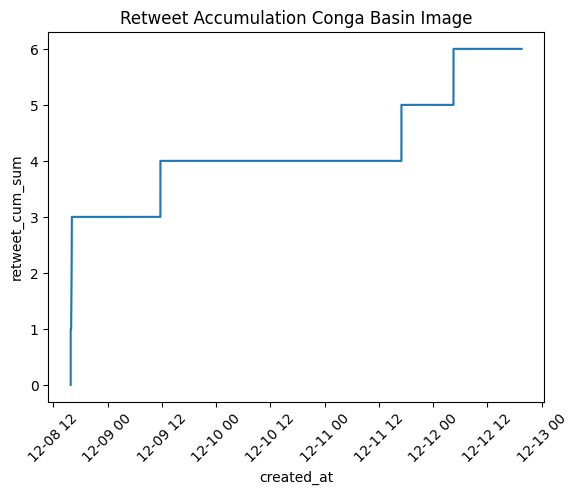

In [36]:
sns.lineplot(data=df, x="created_at", y="retweet_cum_sum")
plt.title("Retweet Accumulation Conga Basin Image")
plt.xticks(rotation=45)

## CNN Clusters

In [61]:
df = pd.read_csv("../../../../data/cnn_imgs_clustered.csv")
# 99, 96, okay, 197 = winner
df = df[df["cluster"] == 197]
media_keys = tuple(df["image_id"].apply(lambda x: eval(x)[0]).unique())
(media_keys)

('3_675047596000419841',
 '3_673504617813164033',
 '3_674537185123639296',
 '3_675655200556892160',
 '3_674366586594197504',
 '3_673641770828328960',
 '3_674598308342538240',
 '3_674599696917266432',
 '3_674748824540323840',
 '3_675316906988085248',
 '3_675709699249991680',
 '3_675754183316770816',
 '3_674638060009734144')

In [65]:
conn = get_db_connection(db_type="sqlite", db_path="../../../../data/twitter.db")
cur = conn.cursor()
res = cur.execute(f"""
        SELECT
            tweets.id,
            tweets.text,
            tweets.author_id,
            value as media_key,
            json_extract(public_metrics, '$.retweet_count') AS retweet_count,
            tweets.lang,
            datetime(created_at) AS created_at
        FROM tweets,
            json_each(json_extract(attachments, '$.media_keys'))
        WHERE
            json_extract(public_metrics, '$.retweet_count') IS NOT NULL
        AND
            media_key IN {media_keys}
        ORDER BY created_at
""")
df = pd.DataFrame(res.fetchall())
df["created_at"] = pd.to_datetime(df["created_at"])
df["retweet_cum_sum"] = df["retweet_count"].cumsum()
print(df.info())
print(f"{len(df['author_id'].unique())} Unique author posts")
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               2412 non-null   object        
 1   text             2412 non-null   object        
 2   author_id        2412 non-null   object        
 3   media_key        2412 non-null   object        
 4   retweet_count    2412 non-null   int64         
 5   lang             2412 non-null   object        
 6   created_at       2412 non-null   datetime64[ns]
 7   retweet_cum_sum  2412 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 150.9+ KB
None
2129 Unique author posts


,id,text,author_id,media_key,retweet_count,lang,created_at,retweet_cum_sum
0,673504618735935488,The Negotiation Update for 6 December is now a...,17463923,3_673504617813164033,236,en,2015-12-06 14:09:48,236
1,673504824894300160,RT @UNFCCC: The Negotiation Update for 6 Decem...,1934565798,3_673504617813164033,236,en,2015-12-06 14:10:38,472
2,673504841608658944,RT @UNFCCC: The Negotiation Update for 6 Decem...,112823892,3_673504617813164033,236,en,2015-12-06 14:10:42,708
3,673504886844227584,RT @UNFCCC: The Negotiation Update for 6 Decem...,4366636038,3_673504617813164033,236,en,2015-12-06 14:10:52,944
4,673504896302325760,RT @UNFCCC: The Negotiation Update for 6 Decem...,4278589275,3_673504617813164033,236,en,2015-12-06 14:10:55,1180
5,673505228096933888,RT @UNFCCC: The Negotiation Update for 6 Decem...,48984952,3_673504617813164033,236,en,2015-12-06 14:12:14,1416
6,673505395009286144,RT @UNFCCC: The Negotiation Update for 6 Decem...,87781992,3_673504617813164033,236,en,2015-12-06 14:12:53,1652
7,673505447907885056,RT @UNFCCC: The Negotiation Update for 6 Decem...,566336166,3_673504617813164033,236,en,2015-12-06 14:13:06,1888
8,673505794747473920,RT @UNFCCC: The Negotiation Update for 6 Decem...,163396346,3_673504617813164033,236,en,2015-12-06 14:14:29,2124
9,673505909843353600,RT @UNFCCC: The Negotiation Update for 6 Decem...,2603889039,3_673504617813164033,236,en,2015-12-06 14:14:56,2360


(array([16776., 16777., 16778., 16779., 16780., 16781., 16782.]),
 [Text(16776.0, 0, '2015-12-07'),
  Text(16777.0, 0, '2015-12-08'),
  Text(16778.0, 0, '2015-12-09'),
  Text(16779.0, 0, '2015-12-10'),
  Text(16780.0, 0, '2015-12-11'),
  Text(16781.0, 0, '2015-12-12'),
  Text(16782.0, 0, '2015-12-13')])

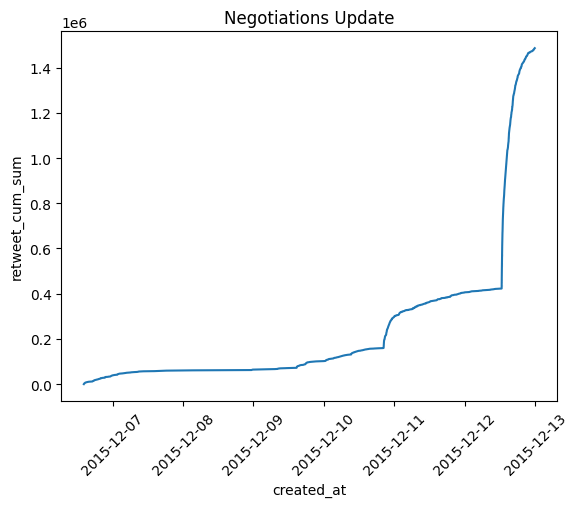

In [66]:
sns.lineplot(data=df, x="created_at", y="retweet_cum_sum")
plt.title("Negotiations Update")
plt.xticks(rotation=45)